# Analyzing Apple and Netflix Stock Data using the yfinance library

In [1]:
!pip install yfinance==0.1.67
!pip install -U kaleido

In [2]:
import yfinance as yf 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
apple = yf.Ticker('AAPL')

In [4]:
appl_info = apple.info
#print(appl_info)

In [5]:
print(appl_info.keys())

print(appl_info['earningsQuarterlyGrowth'])

print(appl_info['dividendRate'])

dict_keys(['zip', 'sector', 'fullTimeEmployees', 'longBusinessSummary', 'city', 'phone', 'state', 'country', 'companyOfficers', 'website', 'maxAge', 'address1', 'industry', 'ebitdaMargins', 'profitMargins', 'grossMargins', 'operatingCashflow', 'revenueGrowth', 'operatingMargins', 'ebitda', 'targetLowPrice', 'recommendationKey', 'grossProfits', 'freeCashflow', 'targetMedianPrice', 'currentPrice', 'earningsGrowth', 'currentRatio', 'returnOnAssets', 'numberOfAnalystOpinions', 'targetMeanPrice', 'debtToEquity', 'returnOnEquity', 'targetHighPrice', 'totalCash', 'totalDebt', 'totalRevenue', 'totalCashPerShare', 'financialCurrency', 'revenuePerShare', 'quickRatio', 'recommendationMean', 'exchange', 'shortName', 'longName', 'exchangeTimezoneName', 'exchangeTimezoneShortName', 'isEsgPopulated', 'gmtOffSetMilliseconds', 'quoteType', 'symbol', 'messageBoardId', 'market', 'annualHoldingsTurnover', 'enterpriseToRevenue', 'beta3Year', 'enterpriseToEbitda', '52WeekChange', 'morningStarRiskRating', 'f

In [6]:
#observing share price over time 

appl_share_df = apple.history(period='max')

In [7]:
appl_share_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.100039,0.100474,0.100039,0.100039,469033600,0.0,0.0
1980-12-15,0.095255,0.095255,0.094820,0.094820,175884800,0.0,0.0
1980-12-16,0.088296,0.088296,0.087861,0.087861,105728000,0.0,0.0
1980-12-17,0.090035,0.090470,0.090035,0.090035,86441600,0.0,0.0
1980-12-18,0.092646,0.093081,0.092646,0.092646,73449600,0.0,0.0


In [8]:
appl_share_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10532 entries, 1980-12-12 to 2022-09-20
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10532 non-null  float64
 1   High          10532 non-null  float64
 2   Low           10532 non-null  float64
 3   Close         10532 non-null  float64
 4   Volume        10532 non-null  int64  
 5   Dividends     10532 non-null  float64
 6   Stock Splits  10532 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 658.2 KB


In [9]:
appl_share_df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,10532.000000,10532.000000,10532.000000,10532.000000,1.053200e+04,10532.000000,10532.000000
mean,14.962085,15.129996,14.797348,14.970124,3.292913e+08,0.000627,0.001614
std,33.346361,33.743343,32.964475,33.370195,3.384003e+08,0.010324,0.085494
min,0.038711,0.038711,0.038276,0.038276,0.000000e+00,0.000000,0.000000
25%,0.236290,0.242250,0.231201,0.236743,1.225840e+08,0.000000,0.000000
50%,0.396415,0.403712,0.390233,0.396428,2.169244e+08,0.000000,0.000000
75%,13.435197,13.545964,13.255436,13.371485,4.085151e+08,0.000000,0.000000
max,181.877391,182.186111,178.381846,181.259918,7.421641e+09,0.230000,7.000000


In [10]:
appl_share_df.reset_index(inplace=True)

<AxesSubplot:xlabel='Date', ylabel='Open'>

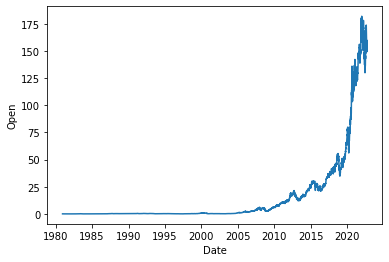

In [11]:
sns.lineplot(x='Date',y='Open',data=appl_share_df)

In [12]:
dividends_df = apple.dividends

In [13]:
dividends_df.head()

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
Name: Dividends, dtype: float64

In [14]:
dividends_df.describe()

count    76.000000
mean      0.086889
std       0.085854
min       0.000536
25%       0.001071
50%       0.101786
75%       0.157500
max       0.230000
Name: Dividends, dtype: float64

<AxesSubplot:xlabel='Date'>

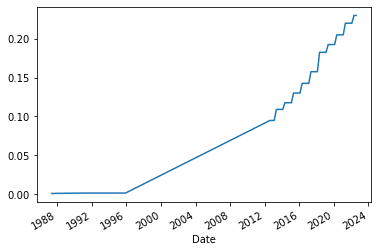

In [15]:
dividends_df.plot()

### Webscraping Netflix Stock Data from the last 5 years

In [16]:
import requests
from bs4 import BeautifulSoup
from lxml import html
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/netflix_data_webpage.html"

data = requests.get(url).text

In [18]:
soup = BeautifulSoup(data, 'html5lib')

In [19]:
soup.prettify()
soup.find('tbody')

<tbody data-reactid="50"><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="51"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="52"><span data-reactid="53">Jun 01, 2021</span></td><td class="Py(10px) Pstart(10px)" data-reactid="54"><span data-reactid="55">504.01</span></td><td class="Py(10px) Pstart(10px)" data-reactid="56"><span data-reactid="57">536.13</span></td><td class="Py(10px) Pstart(10px)" data-reactid="58"><span data-reactid="59">482.14</span></td><td class="Py(10px) Pstart(10px)" data-reactid="60"><span data-reactid="61">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="62"><span data-reactid="63">528.21</span></td><td class="Py(10px) Pstart(10px)" data-reactid="64"><span data-reactid="65">78,560,600</span></td></tr><tr class="BdT Bdc($seperatorColor) Ta(end) Fz(s) Whs(nw)" data-reactid="66"><td class="Py(10px) Ta(start) Pend(10px)" data-reactid="67"><span data-reactid="68">May 01, 2021</span></td><td class="Py(10px) Pstart(10px)

In [20]:
NFLX_df = pd.DataFrame(columns=['Date','Open','High','Low','Close','Volume'])

for row in soup.find('tbody').find_all('tr'):
    
    col = row.find_all('td')
    date = col[0].text
    Open = col[1].text
    high = col[2].text
    low = col[3].text
    close = col[4].text
    adj_close = col[5].text
    volume = col[6].text
    
    NFLX_df = NFLX_df.append({'Date':date,'Open':Open,'High':high,'Low':low,
                         'Close':close, 'Adj Close': adj_close,
                         'Volume':volume},ignore_index=True)

In [21]:
NFLX_df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,"Jun 01, 2021",504.01,536.13,482.14,528.21,"78,560,600",528.21
1,"May 01, 2021",512.65,518.95,478.54,502.81,"66,927,600",502.81
2,"Apr 01, 2021",529.93,563.56,499.00,513.47,"111,573,300",513.47
3,"Mar 01, 2021",545.57,556.99,492.85,521.66,"90,183,900",521.66
4,"Feb 01, 2021",536.79,566.65,518.28,538.85,"61,902,300",538.85


### Data cleaning, all data types are "object", need to be converted to date, int, and float

In [22]:
for col in ['Open','High','Low','Close','Adj Close']:
    
    NFLX_df[col] = NFLX_df[col].astype('float64')

In [23]:
NFLX_df['Date'] = pd.to_datetime(NFLX_df['Date'])


In [24]:
type(NFLX_df['Volume'][0])

str

In [25]:
NFLX_df['Volume'] = NFLX_df['Volume'].apply(lambda x: int(x.replace(',','')))

In [26]:
NFLX_df = NFLX_df.set_index('Date')
NFLX_df.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2021-06-01,504.01,536.13,482.14,528.21,78560600,528.21
2021-05-01,512.65,518.95,478.54,502.81,66927600,502.81
2021-04-01,529.93,563.56,499.00,513.47,111573300,513.47
2021-03-01,545.57,556.99,492.85,521.66,90183900,521.66
2021-02-01,536.79,566.65,518.28,538.85,61902300,538.85


In [27]:
NFLX_df.dtypes
#data is cleaned

Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [28]:
NFLX_df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,70.000000,70.000000,70.000000,70.000000,7.000000e+01,70.000000
mean,280.746000,307.922286,260.706714,286.039571,1.947877e+08,286.039571
std,145.711699,158.539029,136.575328,146.445067,9.843842e+07,146.445067
min,90.410000,97.480000,79.950000,90.030000,6.190230e+07,90.030000
25%,141.610000,146.535000,138.360000,143.550000,1.176592e+08,143.550000
50%,292.345000,330.315000,264.110000,294.550000,1.697723e+08,294.550000
75%,373.875000,393.377500,342.420000,373.232500,2.426182e+08,373.232500
max,545.570000,593.290000,518.280000,540.730000,4.974012e+08,540.730000


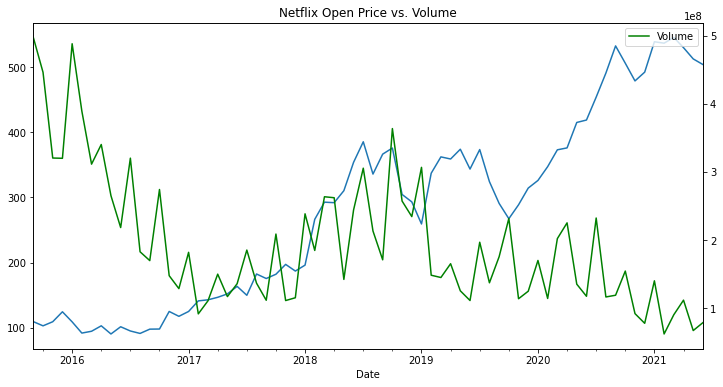

In [29]:
# Open vs volume over time 
fig = plt.figure(figsize=(12,6))

NFLX_df['Open'].plot()

NFLX_df['Volume'].plot(secondary_y = True, style='g')
plt.title('Netflix Open Price vs. Volume')
plt.legend()

<Figure size 864x360 with 0 Axes>

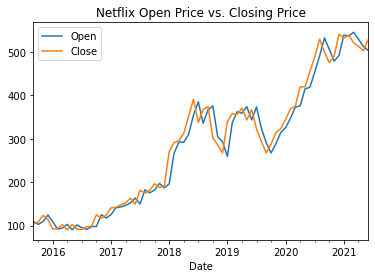

In [30]:
fig2 = plt.figure(figsize=(12,5))

NFLX_df[['Open','Close']].plot()
plt.title('Netflix Open Price vs. Closing Price')
plt.legend()

### Comparing Apple and Netflix 

In [31]:
appl_2016_2021 = appl_share_df[appl_share_df['Date']> '2016-01-01']

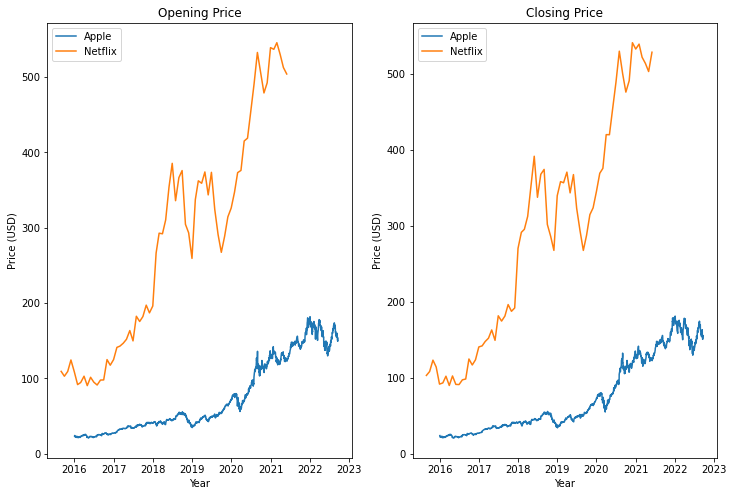

In [32]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,8))

ax1.plot(appl_2016_2021.set_index('Date')['Open'], label='Apple')
ax1.plot(NFLX_df['Open'], label='Netflix')
ax1.set_title('Opening Price')
ax1.set_xlabel('Year')
ax1.set_ylabel('Price (USD)')
ax1.legend(loc='upper left')

ax2.plot(appl_2016_2021.set_index('Date')['Close'], label='Apple')
ax2.plot(NFLX_df['Close'],label='Netflix')
ax2.set_title('Closing Price')
ax2.set_xlabel('Year')
ax2.set_ylabel('Price (USD)')
ax2.legend(loc='upper left')

From the years 2016-2021, Netflix was trading at a much higher price than apple but also showed more volatility in comparison. 

### Observing the effect of USA GDP and Unemployment Rates on Apple and Netflix Stock Price

GDP Data: USA yearly values retrieved from https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.KD.ZG&country=USA 

Unemployment rate data: 2012-2022, values retrieved from U.S. Bureau of Labor Statistics
https://data.bls.gov/timeseries/LNS14000000?amp%253bdata_tool=XGtable&output_view=data&include_graphs=true

In [33]:
GDP = pd.DataFrame({'Year':list(range(2012,2022)),
                    'GDP Growth (annual%)':[2.3,1.8,2.3,2.7,1.7,2.3,2.9,2.3,-3.4,5.7]})

<AxesSubplot:xlabel='Year'>

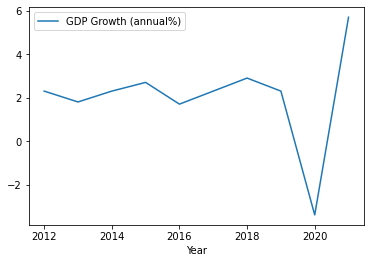

In [34]:
GDP.set_index('Year').plot()

In [35]:
#unemp_df = pd.read_csv('Unemployment_rate.csv')

# Analyzing Tesla and Gamestop Stock Data

In [36]:
!pip install -U kaleido

import plotly.io as pio
pio.renderers.default = "svg"

In [37]:
def draw_graph(stock_data, revenue_data, stock):
    
    fig = make_subplots(rows=2,cols=1,shared_xaxes=True, 
                       subplot_titles = ("Share Price History","Revenue History"),
                       vertical_spacing=0.3)
    specific_stockdata = stock_data[stock_data.Date <= '2021--06-14']
    specific_revenuedata = revenue_data[revenue_data.Date <= '2021-04-30']
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(specific_stockdata.Date,
                                             infer_datetime_format=True)
                             ,y=specific_stockdata.Close.astype('float'),name="Share Price"),row=1,col=1)
    
    fig.add_trace(go.Scatter(x=pd.to_datetime(specific_revenuedata.Date, infer_datetime_format=True), 
                             y=specific_revenuedata.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

### Using yahoo finance to gather Tesla Stock Data

In [38]:
TSLA = yf.Ticker('TSLA')

In [39]:
TSLA_share_df = TSLA.history(period='max')

In [40]:
TSLA_share_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


In [41]:
TSLA_share_df.reset_index(inplace=True)
TSLA_share_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,281494500,0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,257806500,0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,123282000,0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,77097000,0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,103003500,0,0.0


### Webscrape data for Tesla's Revenue

In [42]:
url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'
html_data = requests.get(url).text


In [43]:
soup = BeautifulSoup(html_data, 'html5lib')
#soup.prettify()

In [44]:
tables = soup.find_all('table')
TSLA_revenue = pd.read_html(str(tables[1]),flavor='bs4')[0]
TSLA_revenue.columns = ['Date','Revenue']
TSLA_revenue.head()

,Date,Revenue
0,2022-06-30,"$16,934"
1,2022-03-31,"$18,756"
2,2021-12-31,"$17,719"
3,2021-09-30,"$13,757"
4,2021-06-30,"$11,958"


In [45]:
TSLA_revenue['Revenue'] = TSLA_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-45-5861c70140d1>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [46]:
TSLA_revenue.dropna(inplace=True)

In [47]:
#Observe the last five rows of the dataframe
TSLA_revenue.iloc[-5:-1,:]


,Date,Revenue
47,2010-09-30,31
48,2010-06-30,28
49,2010-03-31,21
51,2009-09-30,46


### Using yahoo finance to gather Gamestop Stock Data

In [48]:
GME = yf.Ticker('GME')

In [49]:
GME_share_df = GME.history(period='max')

In [50]:
GME_share_df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2002-02-13,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
2002-02-14,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2002-02-15,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
2002-02-19,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
2002-02-20,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


In [51]:
GME_share_df.reset_index(inplace=True) 

### Webscrape data for Gamestop's Revenue 

In [52]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

html_data2 = requests.get(url).text

In [53]:
soup = BeautifulSoup(html_data2, 'html5lib')

In [54]:
tables2 = soup.find_all('table')[1]

GME_revenue = pd.read_html(str(tables2),flavor='bs4')[0]

GME_revenue.columns = ['Date','Revenue']

GME_revenue.head()

,Date,Revenue
0,2020-04-30,"$1,021"
1,2020-01-31,"$2,194"
2,2019-10-31,"$1,439"
3,2019-07-31,"$1,286"
4,2019-04-30,"$1,548"


In [55]:
GME_revenue["Revenue"] = GME_revenue['Revenue'].str.replace(',|\$',"")

<ipython-input-55-c6e24901842e>:1: FutureWarning:

The default value of regex will change from True to False in a future version.



In [56]:
GME_revenue.dropna(inplace=True)

In [57]:
GME_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


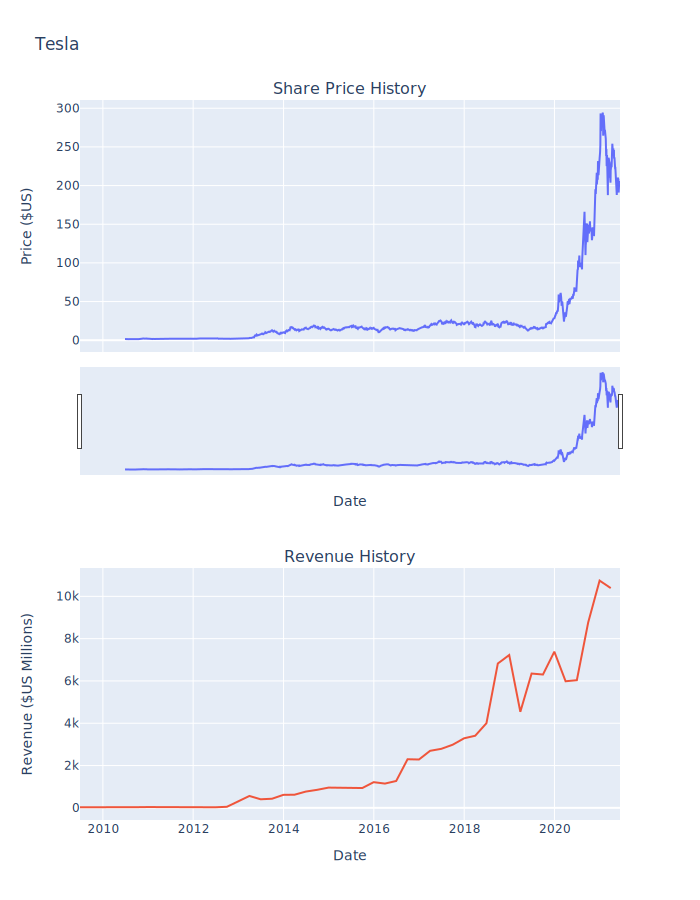

In [58]:
draw_graph(TSLA_share_df, TSLA_revenue, 'Tesla')

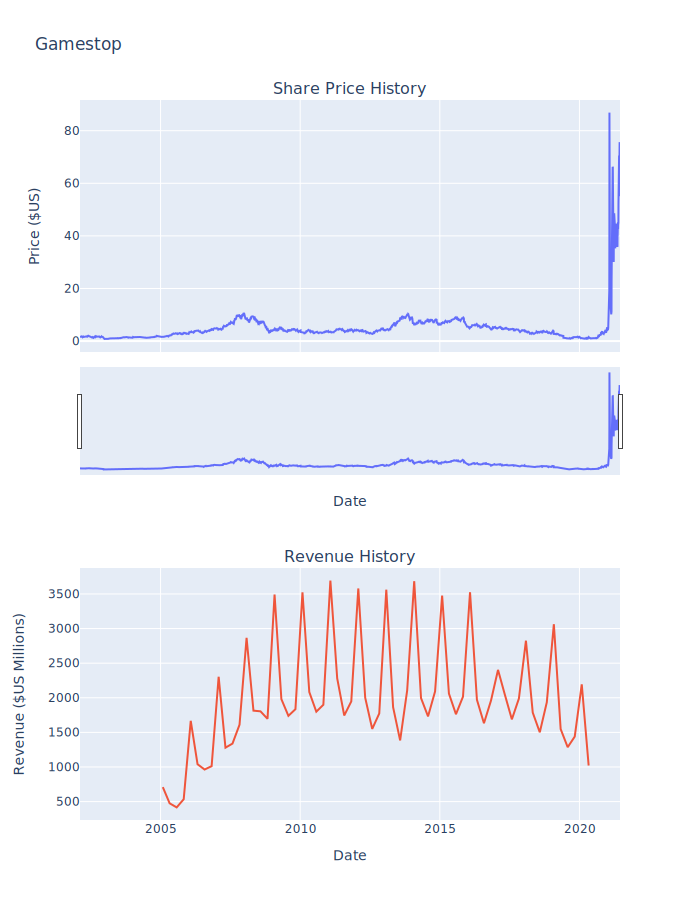

In [59]:
draw_graph(GME_share_df, GME_revenue, 'Gamestop')